# Week X - Basics of Machine Learning - Part 2

<hr style="border:2px solid gray">

# Index: <a id='index'></a>
1. [Basics of Classification](#classification_basics)
1. [The MNIST Dataset](#MNIST)
1. [Confusion Matrix](#confusion)
1. [The ROC Curve](#roc)
1. [Brief Introduction to Multiclass Classification](#multiclass)

<hr style="border:2px solid gray">

# Basics of Classification [^](#index) <a name="classification_basics"></a> 

### Introduction to Classification

 In **classification** ML models, the model will make a prediction about how to **categorise a datapoint**. 
 
 
 We will start by looking at one of the most famous datasets in ML, a dataset that describes three different sorts of iris flowers (more information about this dataset can be found on [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)). This dataset is so famous that it is built into sklearn, and we can simply import it into to our notebook. 
 
Each data instance has four features; sepal length, sepal width, petal length and petal width. The target/output is an integer from 0 to 2 corresponding to the three different forms of iris. One drawback of the iris dataset is that it is not very large; it only contains 150 instances.

In [1]:
import numpy as np
import scipy as sp 
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns= iris.feature_names)
print(type(iris))
display(df) #Outputs iris in a nice format

<class 'sklearn.utils._bunch.Bunch'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
print(iris.keys()) #.keys() return the keys of the dictionary as a list

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
print(iris['DESCR']) #Description of dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Building the Model

We will start by building a very simple classification model. In the previous notebook, we discussed the KNN algorithm for both regression and clasification, however we only used the model for a regression example. We can now try to use it for classification.

In [5]:
from sklearn.model_selection import train_test_split

#Splitting the data into training and testing portions
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.2)  

In [6]:
print(y_train) #Sanity check that all is well (the outputs are between 0 to 2)

[1 1 0 0 0 1 1 1 0 0 0 1 2 1 1 1 1 2 2 2 0 1 0 1 0 0 2 2 2 2 0 2 0 1 2 1 1
 1 2 1 2 2 0 0 1 1 0 1 2 0 0 0 0 1 0 0 2 0 2 0 2 0 0 1 2 0 1 1 2 1 1 2 0 2
 0 1 0 2 1 0 2 1 2 1 1 0 0 1 2 0 0 1 2 2 1 2 1 0 1 2 2 2 2 2 1 1 0 0 0 1 1
 2 1 0 2 2 0 2 2 0]


It is always important to visualise your data, to look for obvious distinguishing traits (discriminators) or strong correlations. A pandas scatter matrix is a good way to achieve this. 

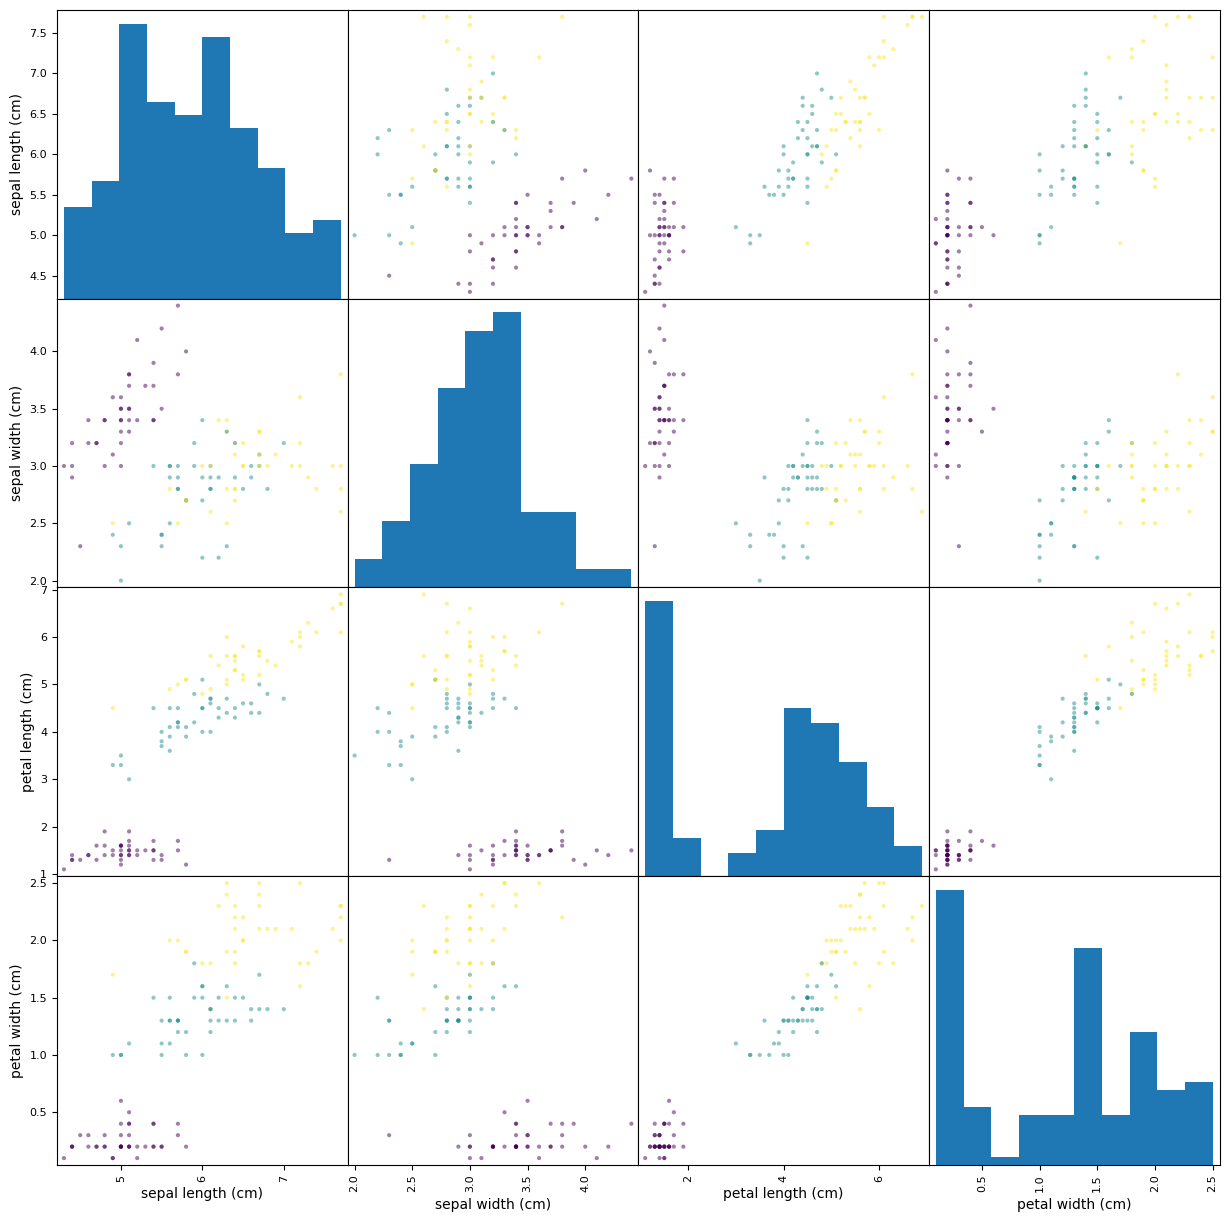

In [7]:
import pandas as pd

df_iris = pd.DataFrame(X_train, columns=iris.feature_names)
pd.plotting.scatter_matrix(df_iris, figsize=(15, 15), c=y_train);

### Training the Model

The plots in the scatter matrix suggest it may be possible to seperate the data. We will now call SKLearn's KNN classifier function and train our model.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = 12 #Here we decided to look at the 12 nearest neighbours to classify something
weights = "uniform"
#weights = "distance"
iris_knn = KNeighborsClassifier(n_neighbors=neighbors, weights=weights)

In [9]:
iris_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

### Making Predictions

We can now compare the accuracy of our model using the test dataset

In [10]:
pred = iris_knn.predict(X_test)

In [11]:
agree = 0
disagree = 0

for i in range(len(pred)): 
    # If the prediction matches the outcome, add one to the agree count
    if pred[i] == y_test[i]: 
        agree = agree +1
        
    else:
        disagree = disagree +1

print("Agreeing ", agree)
print("Disagreeing ", disagree)
print("Success fraction", agree/(agree+disagree))

Agreeing  29
Disagreeing  1
Success fraction 0.9666666666666667


<div style="background-color: #C2F5DD">

### Exercise

Investigate how different hyperparameters (such as number of neighbours, weighting etc) affect the performance of the kNN classifier. Present the information graphically.

### Binary Classifiers

For the rest of this notebook, we will focus on **binary classifiers** - classifiers that sort instances as either belonging to group X or not. These types of classifiers have historically been the most important, and can make key concepts easier to understand. 

If we wanted to seperate our data into more than two categories, we could use binary classification to split each of the two binary groups into further subgroups, repeating this process until the number of desired groups is achieved.

<hr style="border:2px solid gray">
<a name="section-2"></a>

# The MNIST Dataset [^](#index) <a name="MNIST"></a>

The MNIST dataset is probably the most famous dataset in machine learning (see [Wikipedia](https://en.wikipedia.org/wiki/MNIST_database) for more information), and can be used to teach ML models how to read handwritten number. It contains 70,000 of images of handwritten numbers, with each image labelled with the actual number. The numbers are drawn on a 28 x 28 pixel grid.

In this section, we will attempt to train our own number classifier. First we must read in the data:

_Note: This dataset is contains far more information than the iris dataset and thus will be read in slower._




In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print(mnist.keys())

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [13]:
feature_count = 28 * 28 # these are 28 x 28 pixel images, so we should have this many features
print (feature_count)

784


In [49]:
X, y = mnist["data"], mnist["target"]
X.shape
y = y.astype(np.uint8) #Just setting the file type as unsigned integers for later

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [50]:
y.shape

(70000,)

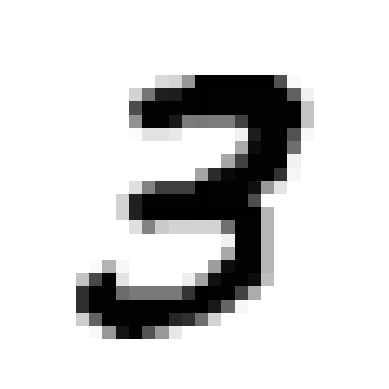

3


In [51]:
some_digit = X[7] #Just to pick an arbitrary figure. Try a different one
some_digit_image = some_digit.reshape(28, 28) #Reshapes the pixels into 28x28 format
plt.imshow(some_digit_image, cmap=mpl.cm.binary) #cmap is the colour map which spans between 0-100 
plt.axis("off")

plt.show()

print (y[7]) #Checking the label 

We will now write a couple of functions to help display the images.<br><br>


<div style="background-color: #FFF8C6">
    
 Below, we define the kwarg `interpolation`. This is because we are resizing the images when we display them (so they are much larger than the original 28 x 28). However, we must fill in the information for any extra pixels by the transformation. More information and examples can be found [here](https://www.cambridgeincolour.com/tutorials/image-interpolation.htm) . `nearest` creates the information for these extra pixels by averaging the values of the pixels around it.

In [52]:
def plot_digit(data, ax):
    image = data.reshape(28, 28)
    ax.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")     
    ax.axis("off")

In [53]:
def plot_digits(instances, images_per_row=10):
    
    num_inst = len(instances)
    
    # The ceiling function is similar to the floor function 
    # except that it rounds up to an integer rather than down
    n_rows = int(np.ceil(num_inst/images_per_row))
    
    plt.figure(figsize=(9, 9))
    plt.axis("off")
    
    for num, digit in enumerate(instances):
        
        ax = plt.subplot(n_rows , images_per_row, num+1)
        plot_digit(digit, ax)      

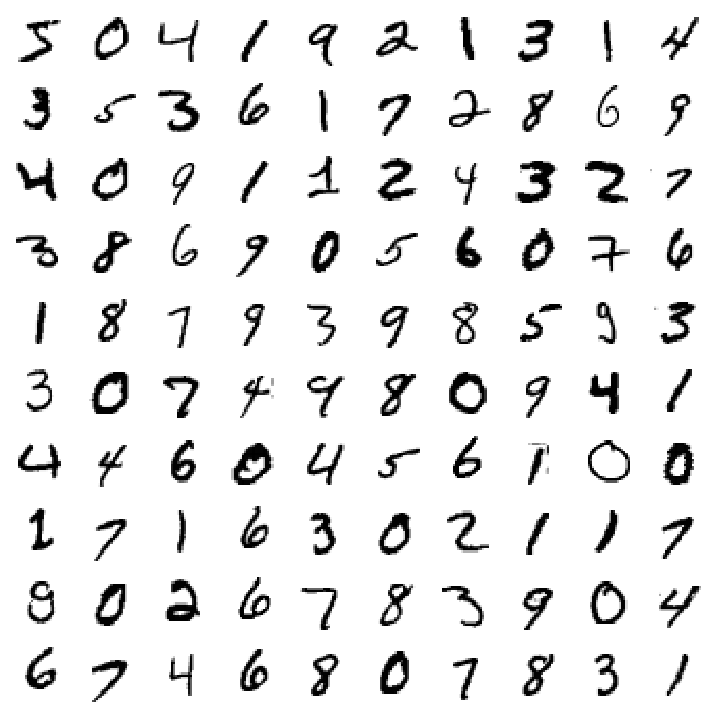

In [54]:
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

### Binary Classifier

Although our data contains 10 obvious categories (the digits 0-9), we can redefine our problem to be one of **binary** classification by simply having two groups - **group 5** and **not group 5** (or any other integer). We must create new labels for our dataset that separates the instances by these two groups:



In [57]:
y_train_5 = (y_train == 5) #True if it was 5, otherwise false
y_test_5 = (y_test == 5)

print (y_train_5)

[ True False False ...  True False False]


There are many binary classifiers that you could use here, and you will learn about two very common ones next week. Here we will use sklearn's **Stochastic Gradient Descent (SGD) Classifier** (see ML Basic 1 for more information) This is typically good for large datasets. 

The default loss function for SGDClassifier is **hinge**, which is a linear SVM. This will discussed in depth in a future notebook, but for now you need only know it is a classifier loss function.

In [56]:
from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42) 

#max_iter is the number of passes/epochs over the training data
#tol is the stopping criterion. Convergence or tolerance for error for consecutive epochs
#random_state Shuffles data, where you pass an integer for repoducible results

sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [58]:
print(sgd_clf.predict([some_digit])) #Remember we set this to X[7] earlier (which was 3)
print(sgd_clf.predict([X[0]])) #However X[0] was 5

[False]
[ True]


### Performance

To examine the performance of our model, we could have a look at the model's accuracy in predicting the test set. However, it is preferrable to keep that dataset "clean" so that we can use it for final evaluation at the end.

An alternative way to measure perrformance is with **Cross Validation**. 

_As a reminder from ML 1, in cross-validation we take $N$-folds from the training set. We use all but one fold as training data and the remaining fold is used as the test data. This process repeats $N$ times, i.e. until each fold has acted as the test set once._

In [59]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy") #This has 3 folds

array([0.95035, 0.96035, 0.9604 ])

This achieves an accuracing rating of $\approx$ 95%, which at first seems like an excellent performance. However, only 1 in 10 data entries have the value 5. This means that if our model classified every data point as not five, it would still be $\approx$ 90% accurate. 

<hr style="border:2px solid gray">

# Confusion Matrix [^](#index) <a name="confusion"></a>

We often refer to the number of instances belonging to the set as the **condition positive, P**, and the number of instances not in the set as the **condition negative, N**. 

A much more insightful way of examining our model's performance would be to look at how often an image labelled as 5 was:
* not classified as a 5 (**false negative, FN**),
* was correctly identified (**true positive - TP**),

or a non-5 was:
* classified as a 5 (**false positive, FP**),
* non-5 was correctly identified (**true negative, TN**).

We are still trying to keep our actual test data "clean" and so we will use cross-validation again. This time we will call cross_val_predict instead of cross_val_score.

In [60]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [61]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

The top row of this matrix is about the non-5s. It shows that there were 53,892 TNs and 687 FPs. The second row is about actual 5s. It shows that there were 1,891 FN (i.e. not idientified as 5) and 3,530 TP.

We can fake what a perfect prediction would look like:

In [62]:
y_train_perfect_predictions = y_train_5 #Setting the predictions to the values themselves
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

### Precision and Recall

The information contained in the confusion matrix can sometimes be better expressed and understood with two fractions: 

1. What fraction of those identified as 5 really are 5. This is called **precision** (sometimes, especially in particle physics, **purity**):

$$ \text{Precision} =\dfrac{TP}{TP+FP} = \dfrac{TP}{\text{Total predicted as belonging to set}} $$

2. What fraction of the true 5s did the model identify. This is called **recall** (sometimes, especially in particle physics, **efficiency**):

$$ \text{Recall} = \dfrac{TP}{TP+FN} = \dfrac{TP}{\text{P}} $$

Sklearn can compute these for you:

In [63]:
from sklearn.metrics import precision_score, recall_score

print(round(precision_score(y_train_5, y_train_pred), 2))

print(round(recall_score(y_train_5, y_train_pred), 2))

0.84
0.65


## Precision vs Recall

When building an ML model, we will sometimes have to make a choice between optimising recall or optimising precision. These decisions often take place under the hood of our model.

The SGDClassifier calculates a score for each data instance. The model's classification of that instance depends on whether that score is above or below some **threshold** value. Changing that threshold would change the precision and recall for this classifier. 

Sklearn does not let you alter the threshold directly, but it does give you access to the **decision score**. You can do this by calling decision_function rather than predict.

We can then use these values to make our own threshold:

In [67]:
y_scores = sgd_clf.decision_function([some_digit]) #Examining our test digit from before
y_scores

array([-4988.52407755])

In [65]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[False]


How to we decide where we want the threshold? The first step is to look at the decision scores. We start by using cross validation with the decision function:

In [68]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [69]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

We can then visualise how the precision and recall values change with the threshold. In red, we will also show the values of the threshold and recall when the precision in 0.9.

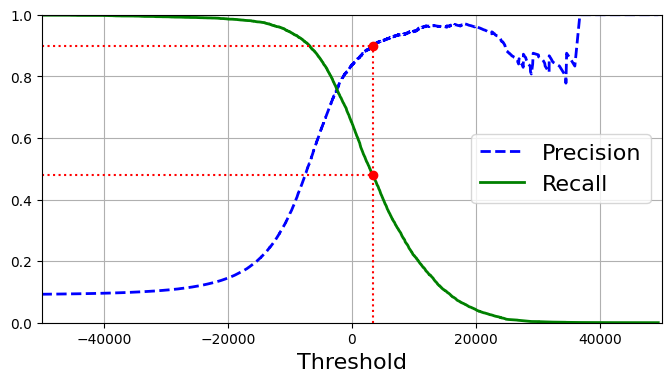

In [71]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1])             


threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:") 

plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")

plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")   

plt.show()

The precision curve is much less smooth than the recall curve. If we increase the threshold, we will categorise fewer values as being 5s. Both the number of true positives and false positives will decrease, but the total number of instances will not change. 

This means that recall (which depends on only the true positive count and some constant) will uniformly decrease. We can see that precision should increase in general, but not necessarily uniformly.


By default, SGDClassifer has set the threshold value as 0. The cell below verifies this claim.

In [73]:
(y_train_pred == (y_scores > 0)).all()

True

We can also demonstrate the tradeoff of recall and precision by plotting the two values against each other. Again, the point on the graph where precision is 0.9 is highlighted.

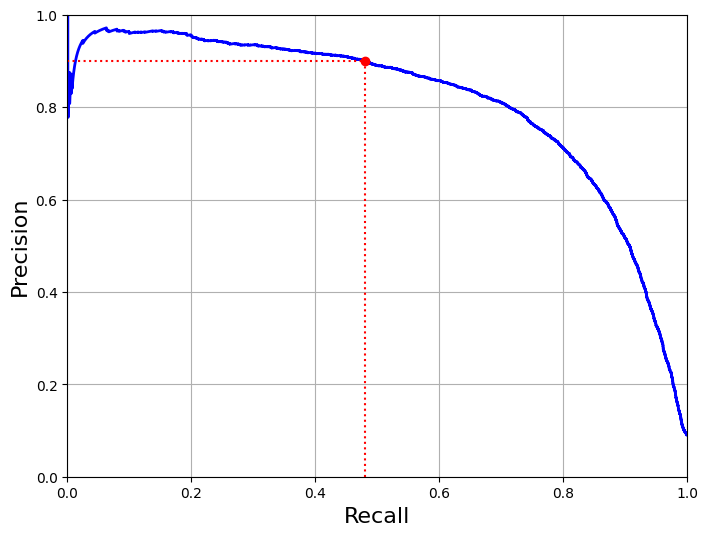

In [74]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")

plt.show()

<hr style="border:2px solid gray">

# The ROC Curve [^](#index) <a name="roc"></a>

Another very common way of viewing performance is the *Receiver Operating Characteristic*  (ROC) curve. The ROC curve plots the True Positive Rate against the False Positive Rate. 

The True Positive Rate (TPR) is the fraction of instances belonging to the dataset that are correctly identified - it is the same as the recall ( $TPR = \frac{TP}{P}$)

The False Positive Rate (FPR) is also referred to as 'the probability of false alarms' or as the fall-out i.e. the fraction of instances not in the set incorrected predicted as belonging to the set: $FPR = \frac{FP}{N}$

Sklearn can calculate these rates for us. 

In [75]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

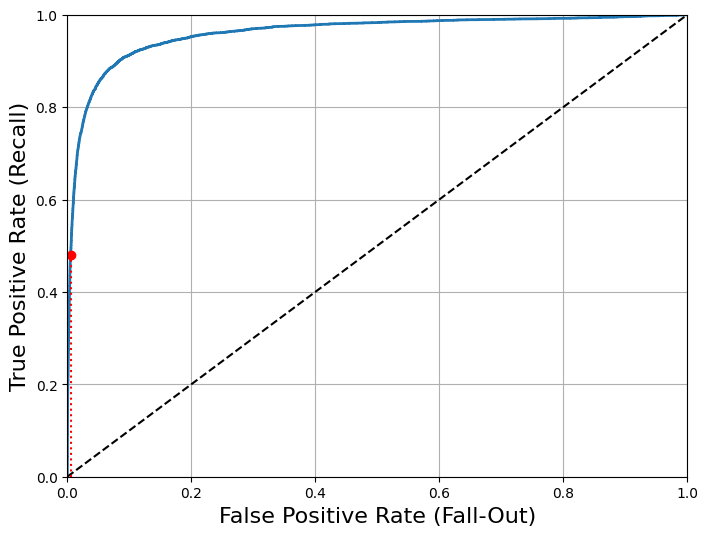

In [76]:
def plot_roc_curve(fpr, tpr, label=None):
    
    plt.plot(fpr, tpr, linewidth=2, label=label)
    
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal line in black
    
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

    
plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr)

#We will indicate on the graph where the precision of the model is 0.9 
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  
plt.plot([fpr_90], [recall_90_precision], "ro")               
                                  
plt.show()

Below is an annotated example of an ROC taken from {HoML}. Models with a ROC curve above the diagonal are doing better to random chance. The closer the ROC curve resembles a step function, the greater the performance of the model.

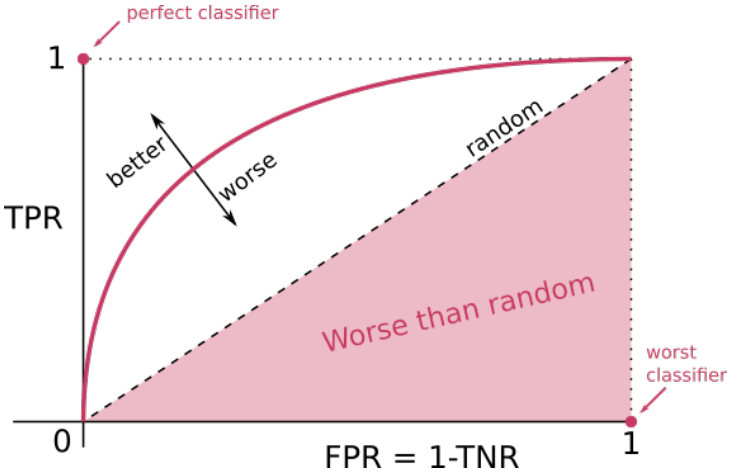



### Area under ROC Curve

One way to compare the performance of different classifiers is to compare the *Area Under ROC Curve* (AUC). The closer this is to 1, the better our trained model should perform. 

We can calculate this value for our classifier:

In [77]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

This is close to 1, so this is a successful AUC score.

<hr style="border:2px solid gray">

# Brief Introduction to Multiclass Classification [^](#index) <a name="multiclass"></a>

You have seen one multiclass classifier today and you will see two more next week. For now, we will experiment with trying to build a multiclass classifier out of binary classifiers.

We will first try this for the iris dataset using a binary kNN classifier. We want to make our model as accurate as possible and thus it is important to choose the optimal hyperparameters. To do this, we will perform a **grid search**.

<div style="background-color: #FFF8C6">
    
### Grid Search
    
To use SKLearn's grid search, you first create a list containing all the hyperparameters and theie values you wish to search over (the 'grid'). GridSearchCV will then evaluate over all possible combinations of these values, and use cross-validation to evaluate them.
    
Grid search is not limited to finding these 'training' hyperparameters. We can also use Grid Search to evaluate whether or not to include particular features, the best way to handle outliers etc.
    
An alternative to grid search is a **randomised search**, where random values for each hyperparameter are used, rather than a more systematic (but slower) approach.

In [78]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'],iris['target'], test_size=0.25)

In [85]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=1)
# Verbose refers to how much information about the current state of training you want the function to print
# Try changing this to 2 to compare

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=1)

In [86]:
# Returns the ideal parameters from the grid search
grid_search.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

In [87]:
grid_search.best_score_

0.9818181818181818

In [88]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9736842105263158

<div style="background-color: #C2F5DD">

### Exercise

Use the KNN classifier as a multiclass classifier to identify all the digits in the MNIST, trying to achieve the greatest accuracy possible.
    
This will require a lot of parameter setting and computing time. You will need to do a **grid scan** to find the optimal parameters.
    
Use the logic from the iris dataset example to guide you.
    
</div>
